In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import glob
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

%matplotlib inline

In [97]:
# Load data
filelst = glob.glob('TB-39 behavior data/*')
rawc_data = scipy.io.loadmat(filelst[0], squeeze_me=True, struct_as_record=False)

In [187]:
def make_frame(sessnum):
    '''Given a session number, return the data frame associated with that session'''
    rawc_data = scipy.io.loadmat(filelst[sessnum], squeeze_me=True, struct_as_record=False)
    data = rawc_data['data']

    # Extract relevant parameters: choice, target and reaction times
    choice = data.response.choice.astype('float64')
    choice[choice == 5] = np.nan
    target = data.stimuli.loc[:len(choice)].astype('float64')
    rtlst = data.response.timePC
    rts = np.zeros_like(choice, dtype='float64')
    
    choice_back1 =  [np.nan] + list(choice[:-1])
    choice_back2 =  [np.nan, np.nan] + list(choice[:-2])

    for i in range(len(choice)):
        rts[i] = rtlst[i][-1]

    datadict = {'choice': choice, 'target': target, 'rt': rts, 'session': sessnum, 'back1': choice_back1,
               'back2': choice_back2}

    return pd.DataFrame(datadict)


In [188]:
choice = choice.astype('float64')
choice[choice==5] = np.nan

In [190]:
all_frames = []
for i in range(len(filelst)):
    all_frames.append(make_frame(i))

all_frame = pd.concat(all_frames)

all_frame_nonan = all_frame.dropna()


X = all_frame_nonan[['back1', 'back2', 'target']]
y = all_frame_nonan['choice']


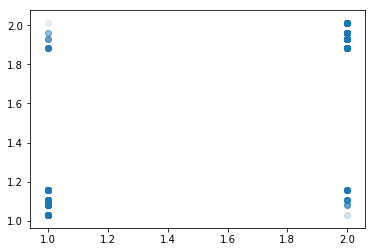

In [196]:
ypred = model.predict(X)
plt.scatter(y, ypred, alpha=0.1)

In [122]:
all_frame.pivot_table('target', index='session', columns='choice')

choice,1,2,5
session,,,
0,1.046512,1.941860,1.761194
1,1.142857,2.000000,1.909091
2,1.047619,1.808333,1.567568
3,1.173611,1.939394,1.777778
4,1.000000,1.936170,1.700000
5,1.018868,1.879433,1.434783
6,1.035714,1.916031,1.500000
7,1.109589,1.928571,1.755319


In [118]:
all_frame

,choice,rt,session,target
0,1,0.227454,0,1
1,5,2.015046,0,2
2,2,0.221668,0,2
3,1,0.213781,0,1
4,5,2.008716,0,2
5,2,0.225789,0,2
6,1,0.205064,0,1
7,2,0.514442,0,2
8,1,0.174532,0,1
9,2,0.361759,0,2


In [59]:
rawc_data['data'].params.blockSeq

array([1, 2], dtype=uint8)

In [32]:
a = rawc_data['data']

In [50]:
b = a['delay']

ValueError: no field of name delay

In [52]:
b[0]

IndexError: too many indices for array